In [ ]:
from collections import deque

def convex_hull(points):
  # Sorter punktene etter x-verdi, med den minste x-verdien først.
  points = sorted(points)

  # Finn de øverste og nederste punktene i hull.
  lower = deque()
  for p in points:
    while len(lower) >= 2 and cross(lower[-2], lower[-1], p) <= 0:
      lower.pop()
    lower.append(p)

  upper = deque()
  for p in reversed(points):
    while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
      upper.pop()
    upper.append(p)

  # Fjern duplikater i toppen og bunnen.
  upper.pop()
  lower.pop()

  # Returner konveks hull som en liste med punkter.
  return list(lower) + list(upper)

def cross(o, a, b):
  # Beregn kryssproduktet mellom vektoren (o, a) og vektoren (o, b).
  return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

Areal: 978948822823.0


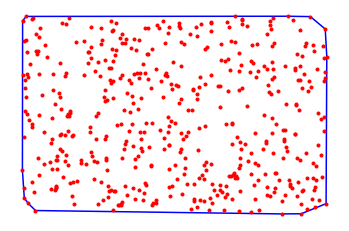

In [34]:
with open("data.txt", "r") as f:
    stolper = f.read().split("\n")
stolper_tuples = []
for stolpe_row in stolper:
    stolpe_row.split(" ")
    list_to_tuple = []
    for coord in stolpe_row.split(" "):
        list_to_tuple.append(int(coord))
    stolper_tuples.append(tuple(list_to_tuple))
hull = convex_hull(stolper_tuples)

def area(polygon):
  n = len(polygon)
  a = 0
  b = 0
  for i in range(n):
    j = (i + 1) % n
    a += polygon[i][0] * polygon[j][1]
    b += polygon[j][0] * polygon[i][1]
  return abs(a - b) / 2.0
# Beregn arealet av polygonet
area = area(hull)

# Skriv ut resultatet
print(f"Areal: {area}")
import numpy as np
import matplotlib.pyplot as plt
L = np.array(hull)
P = np.array(stolper_tuples)
plt.figure()
plt.plot(L[:,0],L[:,1], 'b-', picker=5)
plt.plot([L[-1,0],L[0,0]],[L[-1,1],L[0,1]], 'b-', picker=5)
plt.plot(P[:,0],P[:,1],".r")
plt.axis('off')
plt.show()